<a href="https://colab.research.google.com/github/andrewj-mit/Deep-Learning-Training/blob/main/Healthcare_Data_Classification_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetes Classification

## Import necessary libraries and load the dataset

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

# seed for reproducing same results
seed = 9
np.random.seed(seed)

# load pima indians dataset
dataset = np.loadtxt('/content/diabetes.csv', delimiter=',', skiprows=1)


In [9]:
print(dataset.shape)

(768, 9)


## Prepare the input and output

Diabetes dataset has 8 + 1 columns. In which 8 columns are inputs and 1 column is output.

Split the input and output as X and Y variable.

In [10]:
# split into input and output variables
X = dataset[:,0:8]
Y = dataset[:,8]

# split the data into training (80%) and testing (20%)
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.20, random_state=seed)



## Build your custom neural network model

In [24]:
# create the model
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Compile and run the model

In [25]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=5, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/50
123/123 - 2s - 19ms/step - accuracy: 0.5277 - loss: 10.7183 - val_accuracy: 0.6429 - val_loss: 1.5821
Epoch 2/50
123/123 - 1s - 7ms/step - accuracy: 0.6498 - loss: 1.4518 - val_accuracy: 0.6558 - val_loss: 1.3091
Epoch 3/50
123/123 - 0s - 2ms/step - accuracy: 0.6564 - loss: 1.2299 - val_accuracy: 0.6558 - val_loss: 1.0882
Epoch 4/50
123/123 - 0s - 2ms/step - accuracy: 0.6547 - loss: 0.9761 - val_accuracy: 0.6623 - val_loss: 0.8996
Epoch 5/50
123/123 - 0s - 2ms/step - accuracy: 0.6759 - loss: 0.8716 - val_accuracy: 0.6818 - val_loss: 0.7576
Epoch 6/50
123/123 - 0s - 2ms/step - accuracy: 0.6580 - loss: 0.8285 - val_accuracy: 0.6818 - val_loss: 0.6995
Epoch 7/50
123/123 - 0s - 3ms/step - accuracy: 0.6710 - loss: 0.7566 - val_accuracy: 0.5974 - val_loss: 0.8434
Epoch 8/50
123/123 - 0s - 2ms/step - accuracy: 0.6498 - loss: 0.7367 - val_accuracy: 0.6558 - val_loss: 0.6984
Epoch 9/50
123/123 - 0s - 2ms/step - accuracy: 0.6726 - loss: 0.6884 - val_accuracy: 0.6753 - val_loss: 0.6563

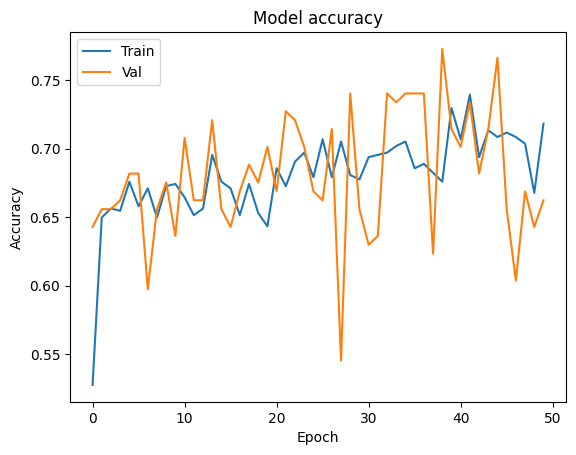

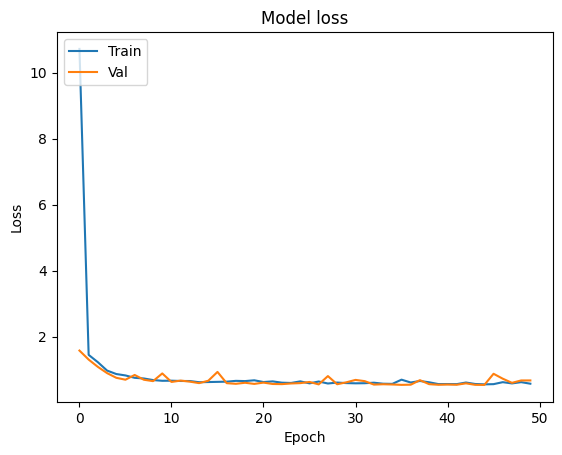

In [26]:
# plot the train vs val accuracy and loss graph

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


# Compare the results of neural networks with Machine learning techniques

## Support Vector Machine

In [15]:
# implement SVC for the same dataset

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVC classifier
svc = SVC()

# Train the classifier
svc.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = svc.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))


Accuracy: 74.03%


## Random Forest

In [16]:
# implement random forest for the same datset

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the classifier
rf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))


Accuracy: 75.32%


## Decision Tree

In [17]:
# implement decision tree for the dataset

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the classifier
dt.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = dt.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))


Accuracy: 72.08%


##XGBoost Classifier

In [18]:
# generate xgboost for the dataset

from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier()

# Train the classifier
xgb.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = xgb.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))


Accuracy: 74.03%


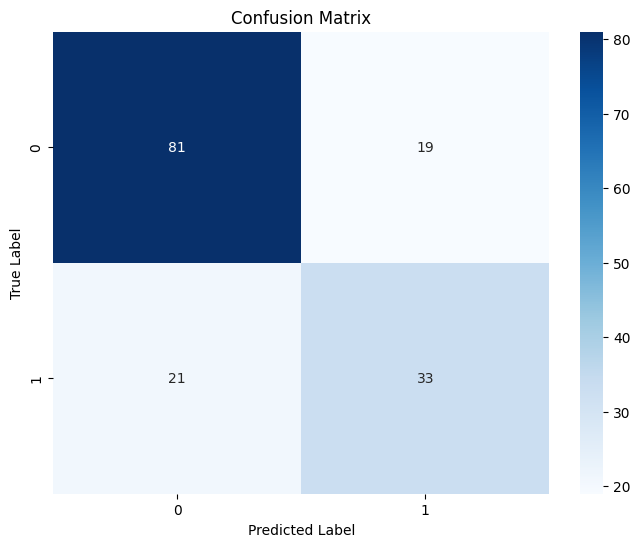

In [19]:
# plot confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set using one of the trained classifiers (e.g., XGBoost)
Y_pred = xgb.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.regularizers import L1, L2
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


# seed for reproducing same results
seed = 9
np.random.seed(seed)


# load pima indians dataset
dataset = pd.read_csv('/content/diabetes.csv', delimiter=',', skiprows=1)

print(dataset.shape)

X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]
#print(X)
#print(Y)

# split the data into training (80%) and testing (20%)
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.20, random_state=seed)

# create the model
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


(767, 9)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
from tensorflow import keras
from tensorflow.keras import callbacks
callback = callbacks.EarlyStopping(monitor='loss', patience=10)

In [30]:
# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=5,callbacks=[callback], verbose=2)

# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/200
123/123 - 2s - 19ms/step - accuracy: 0.6085 - loss: 12.5555 - val_accuracy: 0.5065 - val_loss: 6.3958
Epoch 2/200
123/123 - 0s - 2ms/step - accuracy: 0.4943 - loss: 3.8990 - val_accuracy: 0.4416 - val_loss: 2.5131
Epoch 3/200
123/123 - 0s - 2ms/step - accuracy: 0.4568 - loss: 1.8239 - val_accuracy: 0.4805 - val_loss: 1.3085
Epoch 4/200
123/123 - 0s - 2ms/step - accuracy: 0.5351 - loss: 1.0960 - val_accuracy: 0.5974 - val_loss: 1.0132
Epoch 5/200
123/123 - 0s - 3ms/step - accuracy: 0.5856 - loss: 0.9294 - val_accuracy: 0.6104 - val_loss: 0.9446
Epoch 6/200
123/123 - 1s - 4ms/step - accuracy: 0.5856 - loss: 0.8163 - val_accuracy: 0.5584 - val_loss: 0.8051
Epoch 7/200
123/123 - 0s - 3ms/step - accuracy: 0.5954 - loss: 0.7451 - val_accuracy: 0.6104 - val_loss: 0.8607
Epoch 8/200
123/123 - 0s - 2ms/step - accuracy: 0.5987 - loss: 0.7327 - val_accuracy: 0.5779 - val_loss: 0.7771
Epoch 9/200
123/123 - 0s - 2ms/step - accuracy: 0.6020 - loss: 0.7107 - val_accuracy: 0.6234 - val_los









# Heart Disease Classification

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.regularizers import L1, L2
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


# seed for reproducing same results
seed = 9
np.random.seed(seed)


# load pima indians dataset
dataset = pd.read_csv('/content/heart.csv', delimiter=',')

print(dataset.shape)


(1025, 14)


In [2]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


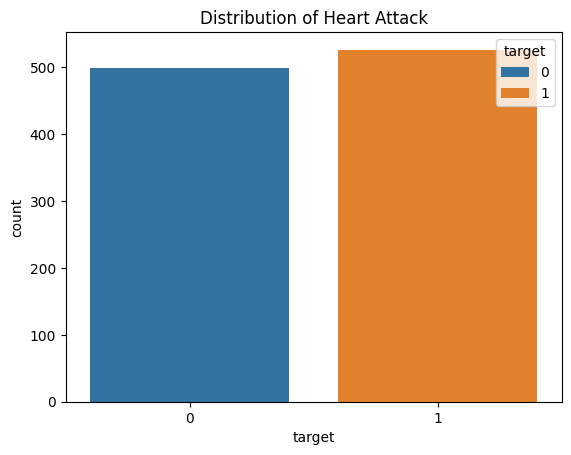

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target', data=dataset,  hue='target')
plt.title('Distribution of Heart Attack')
plt.show()

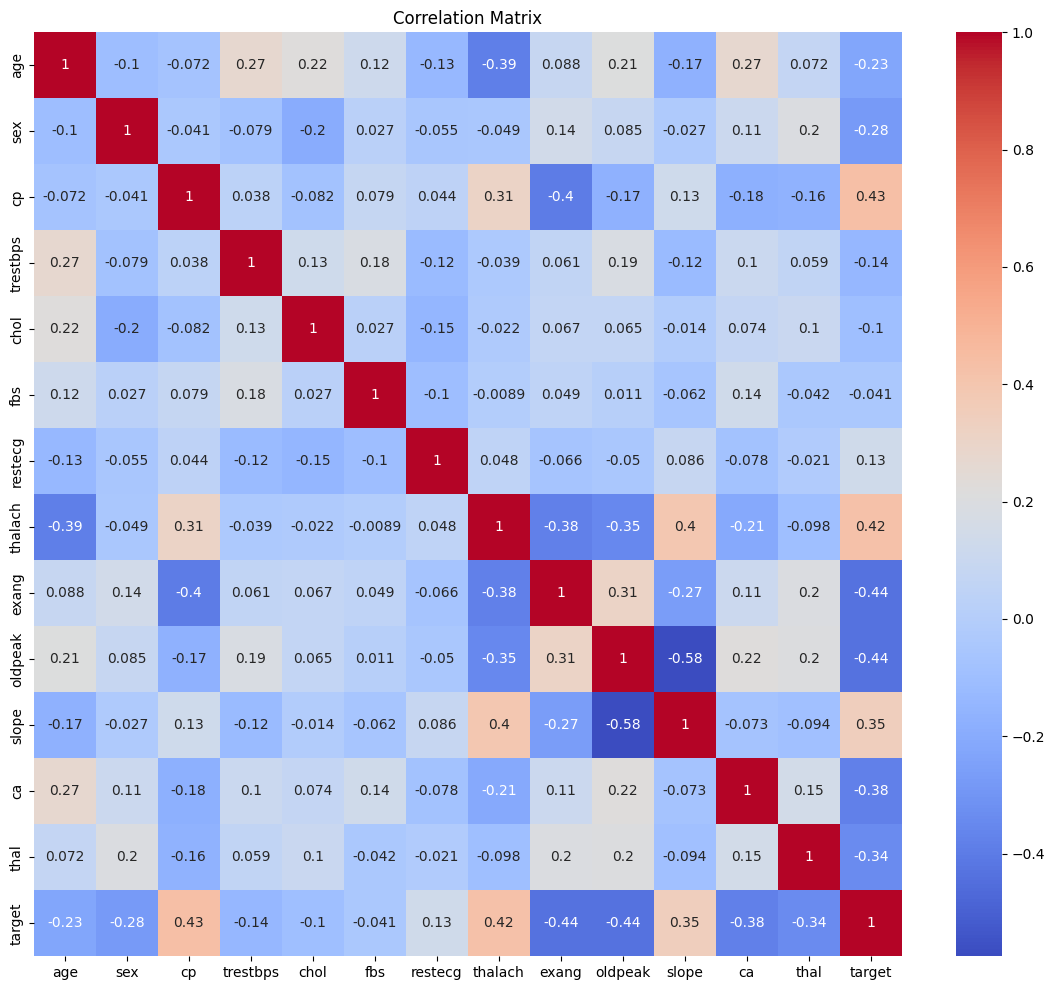

In [7]:
plt.figure(figsize=(14,12))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Split the data into features (X) and target variable (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [12]:
# X = dataset.iloc[:,0:14]
# Y = dataset.iloc[:,14]
print(X)
print(y)



      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [13]:
# split the data into training (80%) and testing (20%)
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y, test_size=0.20, random_state=seed)



In [15]:
# Handle missing values (if any)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [17]:
# Standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier()
}

In [22]:
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(Y_test, Y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        90
           1       0.88      0.91      0.89       115

    accuracy                           0.88       205
   macro avg       0.88      0.87      0.88       205
weighted avg       0.88      0.88      0.88       205

Training Decision Tree...
Decision Tree Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        90
           1       0.97      1.00      0.99       115

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.99       205
weighted avg       0.99      0.99      0.99       205

Training Random Forest...
Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.97      0.99       115

    a

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.96
Decision Tree Accuracy: 0.96
Random Forest Accuracy: 0.96
SVM Accuracy: 0.96
KNN Accuracy: 0.96
Gradient Boosting Accuracy: 0.96
XGBoost Accuracy: 0.96
AdaBoost Accuracy: 0.96
Naive Bayes Accuracy: 0.96
MLP Neural Network Accuracy: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


In [33]:
from keras.utils import to_categorical

y_train = to_categorical(Y_train, num_classes=None)
y_test = to_categorical(Y_test, num_classes=None)

In [34]:
print(y_train.shape)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizersprint(y_test.shape)

(820, 2)
(205, 2)


In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

model = Sequential()
model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

In [48]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [38]:
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 378 (1.48 KB)

 Non-trainable params: 0 (0.00 B)

None


In [46]:
print (X_train[0])

[ 0.17480288 -1.53644256 -0.91016663  0.13457663  3.19641167 -0.42209113
 -0.96858451  0.03126963  1.39250426  0.69693561 -0.61534702  1.17478417
  1.06870179]


In [49]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=5, verbose=2)

Epoch 1/100
164/164 - 2s - 10ms/step - accuracy: 0.7049 - loss: 0.6222 - val_accuracy: 0.8780 - val_loss: 0.5224
Epoch 2/100
164/164 - 0s - 2ms/step - accuracy: 0.8183 - loss: 0.4830 - val_accuracy: 0.8585 - val_loss: 0.3697
Epoch 3/100
164/164 - 1s - 4ms/step - accuracy: 0.8305 - loss: 0.4095 - val_accuracy: 0.8683 - val_loss: 0.3140
Epoch 4/100
164/164 - 0s - 2ms/step - accuracy: 0.8268 - loss: 0.4002 - val_accuracy: 0.8780 - val_loss: 0.3041
Epoch 5/100
164/164 - 1s - 4ms/step - accuracy: 0.8390 - loss: 0.3892 - val_accuracy: 0.8878 - val_loss: 0.2984
Epoch 6/100
164/164 - 1s - 4ms/step - accuracy: 0.8646 - loss: 0.3642 - val_accuracy: 0.8927 - val_loss: 0.2922
Epoch 7/100
164/164 - 1s - 4ms/step - accuracy: 0.8549 - loss: 0.3736 - val_accuracy: 0.9073 - val_loss: 0.2907
Epoch 8/100
164/164 - 1s - 4ms/step - accuracy: 0.8622 - loss: 0.3515 - val_accuracy: 0.8927 - val_loss: 0.2843
Epoch 9/100
164/164 - 1s - 4ms/step - accuracy: 0.8610 - loss: 0.3438 - val_accuracy: 0.9073 - val_loss

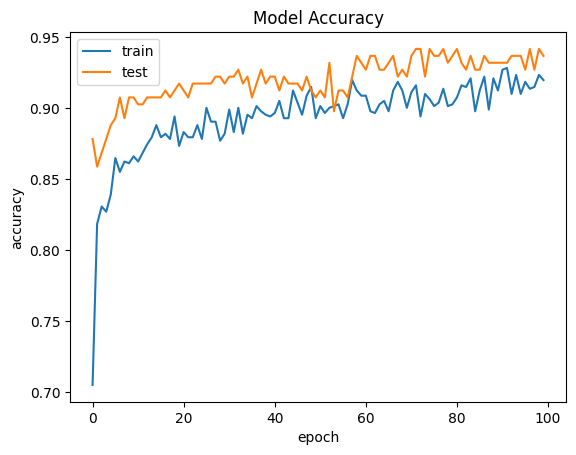

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

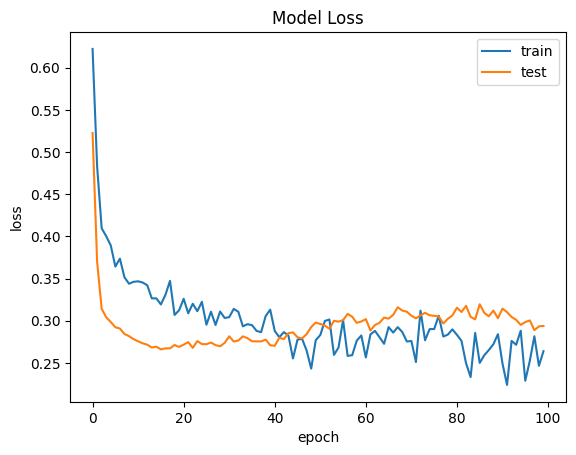

In [52]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


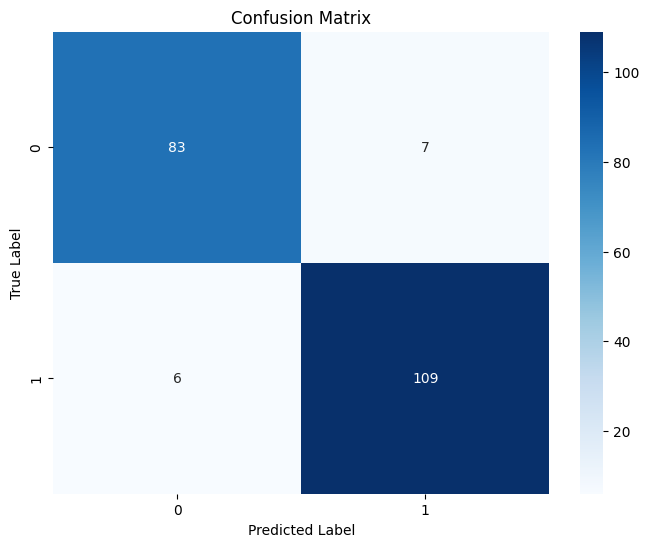

In [53]:
# plot confusion matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [54]:
# print classification report

from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))


              precision    recall  f1-score   support

           0       0.93      0.92      0.93        90
           1       0.94      0.95      0.94       115

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

